In [1]:
import pandas
import numpy
arr = numpy.loadtxt("news_vec.csv", delimiter=",", skiprows=0)
df = pandas.read_csv("news.csv")

In [2]:
arr

array([[ 0.02281413, -0.17723669, -0.13508506, ...,  0.14932056,
         0.11215357,  0.41095725],
       [ 0.00736143, -0.38480246, -0.06400743, ...,  0.00873213,
        -0.20535988,  0.2307152 ],
       [ 0.18793575, -0.00538321, -0.1219346 , ...,  0.01938213,
         0.05972276,  0.35837272],
       ...,
       [-0.12519734, -0.1841969 , -0.18963887, ...,  0.02608965,
        -0.03715415,  0.25774932],
       [-0.11624447, -0.20403437, -0.14648224, ...,  0.31610915,
        -0.13990121,  0.19243106],
       [ 0.41316631, -0.0947281 , -0.23552676, ..., -0.07068527,
         0.00761742,  0.5309391 ]])

In [3]:
arr.shape

(366, 768)

In [4]:
df["Trump_flag"] = df["News"].apply(lambda x: 1 if "Trump" in x else 0)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(arr)
vec2 = pca.transform(arr)

In [6]:
import matplotlib.pyplot as plt

In [7]:
vec2[0:3]

array([[ 1.08691697,  1.62751136],
       [ 0.6727397 ,  0.92733459],
       [-1.40517422, -0.35770573]])

In [8]:
df["pca_1"] = vec2[:, 0]
df["pca_2"] = vec2[:, 1]

In [9]:
df_flag_0 = df.query("Trump_flag == 0")
df_flag_1 = df.query("Trump_flag == 1")

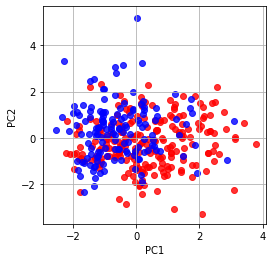

In [10]:
plt.figure(figsize=(4, 4))
plt.scatter(df_flag_0["pca_1"], df_flag_0["pca_2"], alpha=0.8, c="r")
plt.scatter(df_flag_1["pca_1"], df_flag_1["pca_2"], alpha=0.8, c="b")
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()